In [2]:
#importação das bibliotecas necessárias
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as signal


In [35]:
#Geração do sinal exponencial
#Vetor temporal
fs = 1000
t_stop = 5
t = np.arange(0,t_stop,1/fs)
a = 5

#Sinal exponencial
xt = np.exp(-a*t)

#vetor de frequências
N = len(xt)
freq = np.linspace(0,fs,N)
w = 2*np.pi*freq


# Calculo da TF
Como estamos interessados em calcular a FFT da derivada temporal de um sinal, podemos utilizar a seguinte propriedade da T.F.

\begin{equation}

    \mathcal{F}\{ x'(t)\} = \mathrm{j} \omega  \mathcal{F}\{ x(t)\}

\end{equation}

Adicionalmente, o cálculo analítico da T.F do sinal é dado por:

\begin{equation}
    X(\mathrm{j} \omega)=\int^{\infty}_{-\infty} e^{-a t}u(t) e^{-\mathrm{j}\omega t}\mathrm{d}t = 
    \int^{\infty}_{0} e^{-\mathrm{a} t} e^{-\mathrm{j}\omega t}\mathrm{d}t =     
    \int^{\infty}_{0} e^{-t (\mathrm{a}+\mathrm{j}\omega)}\mathrm{d}t =
    \frac{1}{\mathrm{a}+\mathrm{j}\omega}


\end{equation}

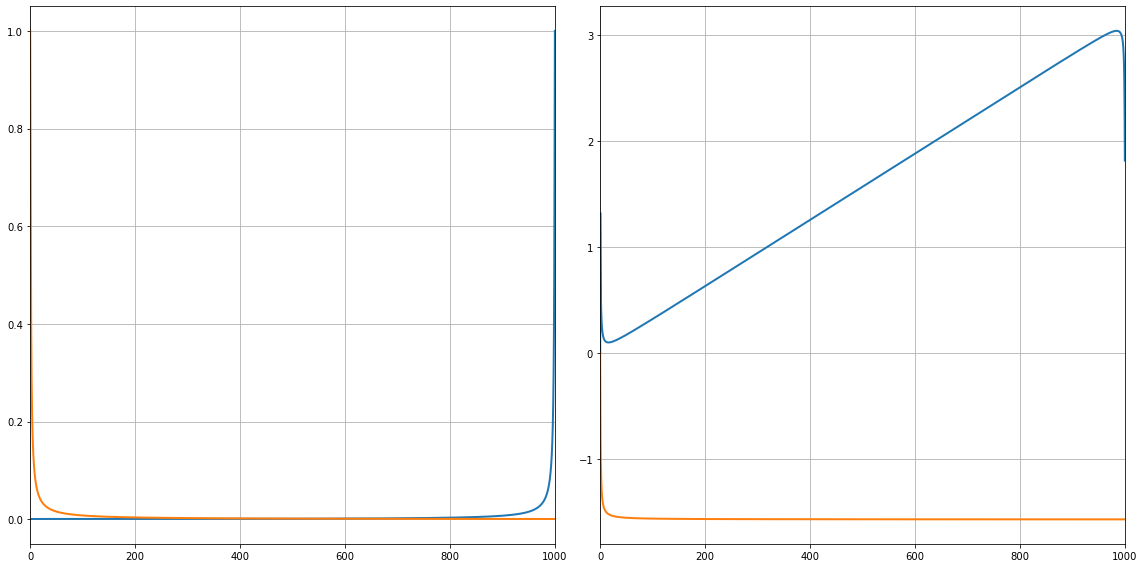

In [52]:
#Cálculo da FFT
Xjw_fft = 1j*w*np.fft.fft(xt)
Xjw_teo = 1/(a+1j*w)

plt.figure(figsize=(16,8), tight_layout=True)

plt.subplot(1,2,1)
plt.plot(freq,np.abs(Xjw_fft)/np.amax(np.abs(Xjw_fft)), linewidth = 2)
plt.plot(freq,np.abs(Xjw_teo)/np.amax(np.abs(Xjw_teo)), linewidth = 2)
plt.xlim(0,fs)
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,np.angle(Xjw_fft), linewidth = 2)
plt.plot(freq,np.angle(Xjw_teo), linewidth = 2)
plt.xlim(0,fs)
plt.grid()

plt.show()